<div style="padding:10px; 
            color:#FFFFFF;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #CC0000;
            background-color:#181B21;
            overflow:hidden;
            font-weight:500">TESLA Stock Price Prediction</div>

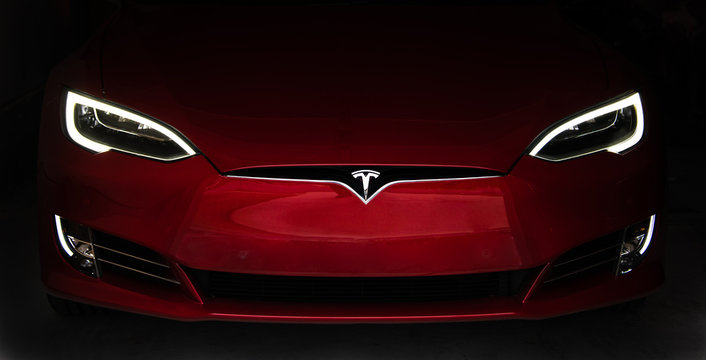

<div style="padding:10px; 
            color:#FFFFFF;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #181B21;
            background-color:#CC0000;
            overflow:hidden;
            font-weight:500">OVERVIEW</div>

The Tesla stock price dataset refers to a collection of data points that represent the historical or current price of the stock for Tesla Inc., a multinational corporation specializing in electric vehicles, energy storage and solar panel manufacturing based in Palo Alto, California. The data points typically include information such as the date, time, and the opening, closing, highest and lowest prices of the stock during a specific period of time. The Tesla stock price dataset can be used for a variety of purposes, such as studying market trends, conducting technical analysis, or training machine learning models for stock price prediction. The data can be obtained from various financial sources such as stock market exchanges, financial websites, or by directly accessing APIs provided by financial data providers.

The following are the common features found in a Tesla stock price dataset:

* **Date:** The date on which the stock price data was recorded.
* **Open:** This refers to the price of the stock at the beginning of the trading day.
* **Close:** This refers to the price of the stock at the end of the trading day.
* **Adj. Close:** The adjusted close price accounts for any corporate actions such as stock splits, dividends, etc. that occurred on that day.
* **High:** The highest price of the stock during the trading day.
* **Low:** The lowest price of the stock during the trading day.

These features can provide valuable information about the stock performance, trends and volatility over a certain period of time, and can be used in financial analysis, prediction, and decision making.

<div style="padding:10px; 
            color:#FFFFFF;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #181B21;
            background-color:#CC0000;
            overflow:hidden;
            font-weight:500">TABLE OF CONTENTS</div>

1. Importing Essential Libraries
2. Importing Data
3. EDA and Feature Engineering
   1. Check for Null values
   2. Plots
   3. Moving Averages
4. Splitting the Time-series Data
5. Scaling Data using Min-Max scaler
6. Model Building
7. Prediction

<div style="padding:10px; 
            color:#FFFFFF;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #181B21;
            background-color:#CC0000;
            overflow:hidden;
            font-weight:500">IMPORING ESSENTIAL LIBRARIES</div>

In [4]:
import pandas as pd  #for data manipulation operations
import numpy as np   #for linear algebra

#Libraries for visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [6]:
import tensorflow as tf

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

from itertools import cycle

ImportError: cannot import name 'dtensor' from 'tensorflow.compat.v2.experimental' (C:\Users\pooja\anaconda3\lib\site-packages\tensorflow\_api\v2\compat\v2\experimental\__init__.py)

<div style="padding:10px; 
            color:#FFFFFF;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #181B21;
            background-color:#CC0000;
            overflow:hidden;
            font-weight:500">IMPORTING DATA</div>

In [2]:
#Loading the required data
df=pd.read_csv('/kaggle/input/-tesla-stock-price-from-2010-to-2023/Tesla Stock Price (2010 to 2023).csv')
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
29/06/2010,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
30/06/2010,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
01/07/2010,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
02/07/2010,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
06/07/2010,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [3]:
print('Number of days present in the dataset: ',df.shape[0])
print('Number of fields present in the dataset: ',df.shape[1])

Number of days present in the dataset:  3162
Number of fields present in the dataset:  6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3162 entries, 29/06/2010 to 19/01/2023
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3162 non-null   float64
 1   High       3162 non-null   float64
 2   Low        3162 non-null   float64
 3   Close      3162 non-null   float64
 4   Adj Close  3162 non-null   float64
 5   Volume     3162 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 172.9+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3162.000000,3162.000000,3162.000000,3162.000000,3162.000000,3.162000e+03
mean,59.090024,60.415403,57.622371,59.039845,59.039845,9.394769e+07
std,95.550672,97.746213,93.067484,95.420232,95.420232,8.175154e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,9.037333,9.252500,8.828500,9.066833,9.066833,4.243012e+07
50%,16.294334,16.514666,16.016334,16.295666,16.295666,7.609725e+07
75%,24.965833,25.212667,24.438666,24.986833,24.986833,1.179720e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


<div style="padding:10px; 
            color:#FFFFFF;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #181B21;
            background-color:#CC0000;
            overflow:hidden;
            font-weight:500">EDA AND FEATURE ENGINEERING</div>

In [6]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

<font color="blue" size=+2.5><b> Check for Null values </b></font>

In [7]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<font color="blue" size=+2.5><b> Plots </b></font>

The stock prices are almost constant until 2019 and thus I'll take the split of the data to only work on the data that shows methodical/abrupt changes.

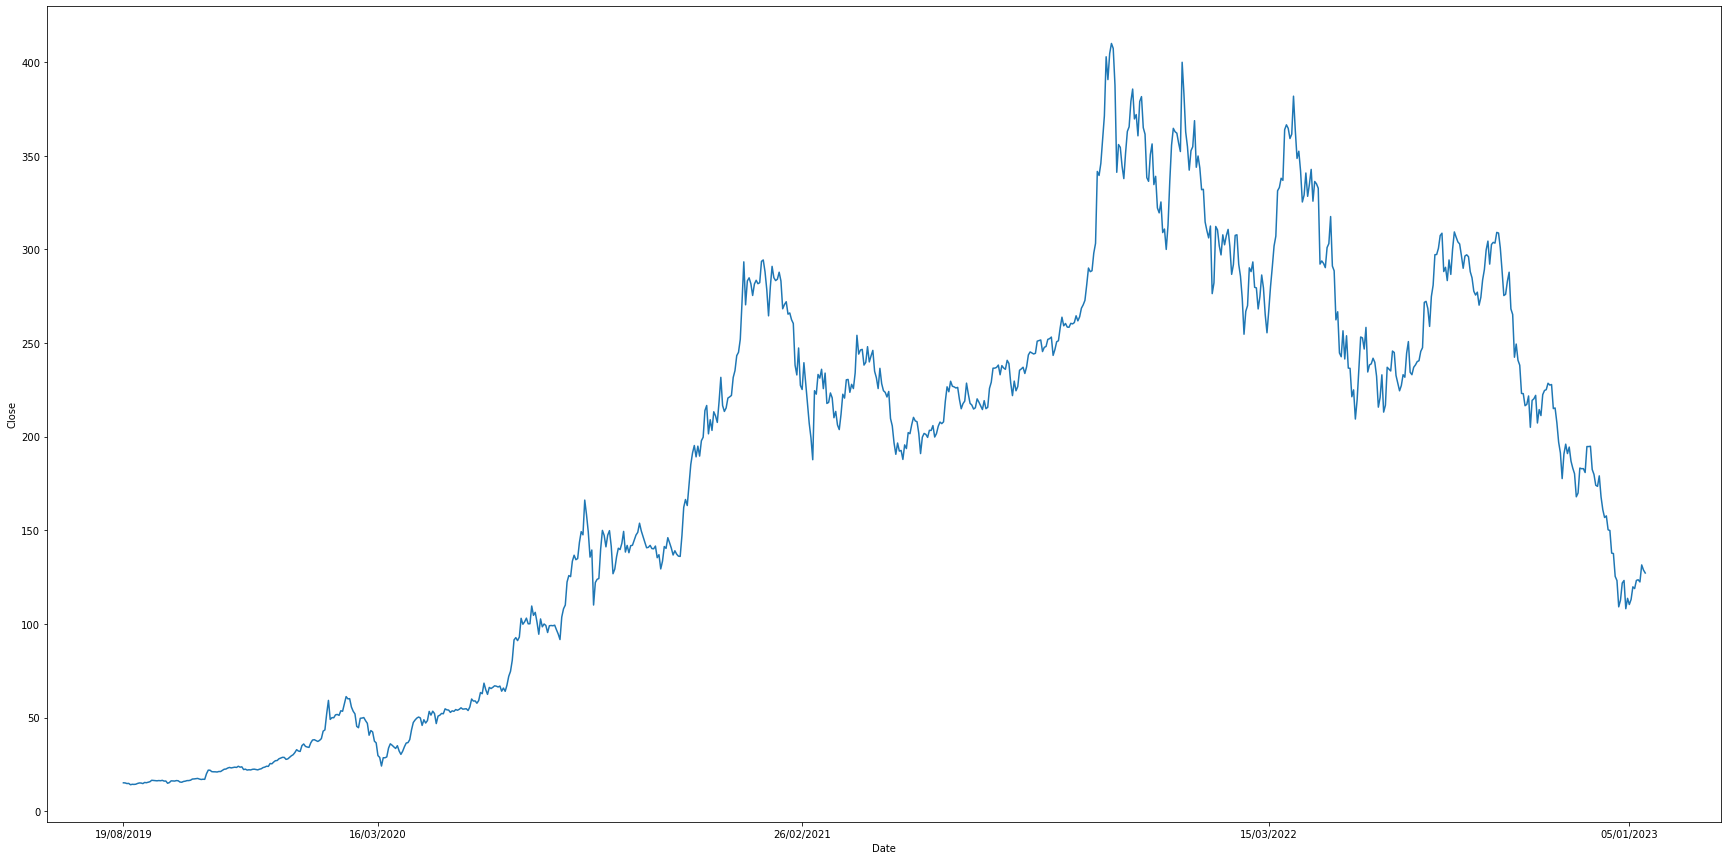

In [8]:
data=df.iloc[2300:].copy()

plt.figure(figsize=(30,15))
ax=sns.lineplot(x=data.index,y=data['Close'])
plt.xticks(['19/08/2019','16/03/2020','26/02/2021','15/03/2022','05/01/2023'])
plt.show()

In [9]:
data=df.iloc[2300:].copy()

names = cycle(['Stock Open Price','Stock High Price','Stock Low Price','Stock Close Price'])

fig = px.line(data, x=data.index, y=[data['Open'],data['High'], data['Low'],data['Close']],
             labels={'date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock Analysis', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.show()

<font color="blue" size=+2.5><b> Moving Averages </b></font>

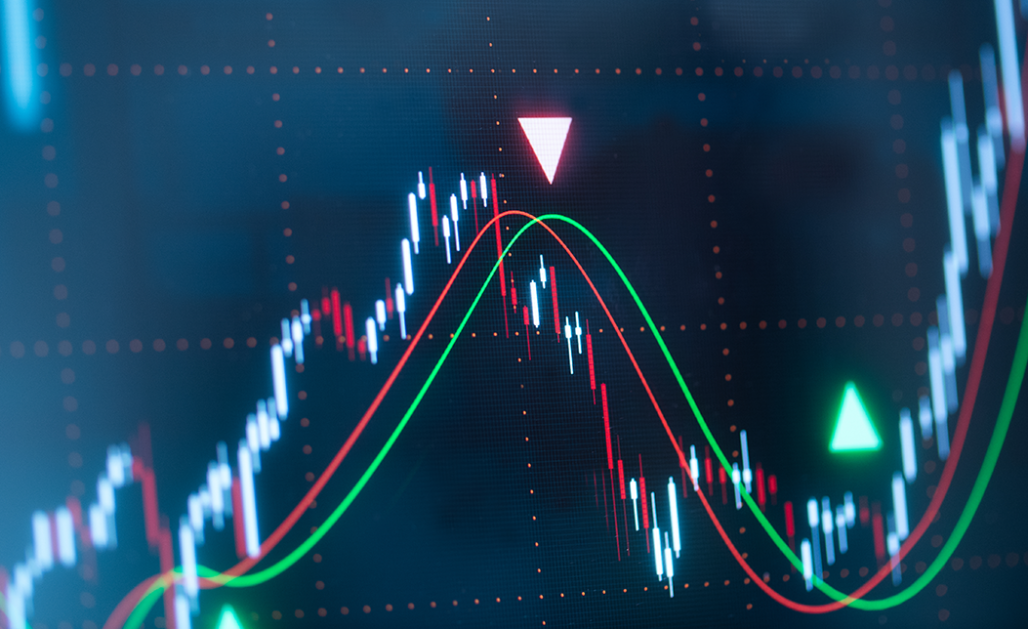

Moving Averages (MA) are a type of time series analysis method used to smooth out fluctuations in data by calculating the average of a set of data over a certain period of time. This average is then shifted forward in time to provide a smoothed representation of the data that can help to identify underlying patterns or trends. There are two main types of moving averages: simple moving averages (SMA) and weighted moving averages (WMA). A simple moving average is calculated by taking the average of a set of data over a fixed period of time, while a weighted moving average gives more importance to the most recent data. Moving averages are widely used in finance, economics, and engineering to help forecast future trends and to identify buy/sell signals.

I'll take moving average for window sizes of 30,60,120 and 150 days.

In [10]:
ma_day = [30, 60, 120,150]

for ma in ma_day:
        column_name = f"MA for {ma} days"
        data[column_name] = data['Close'].rolling(ma).mean()

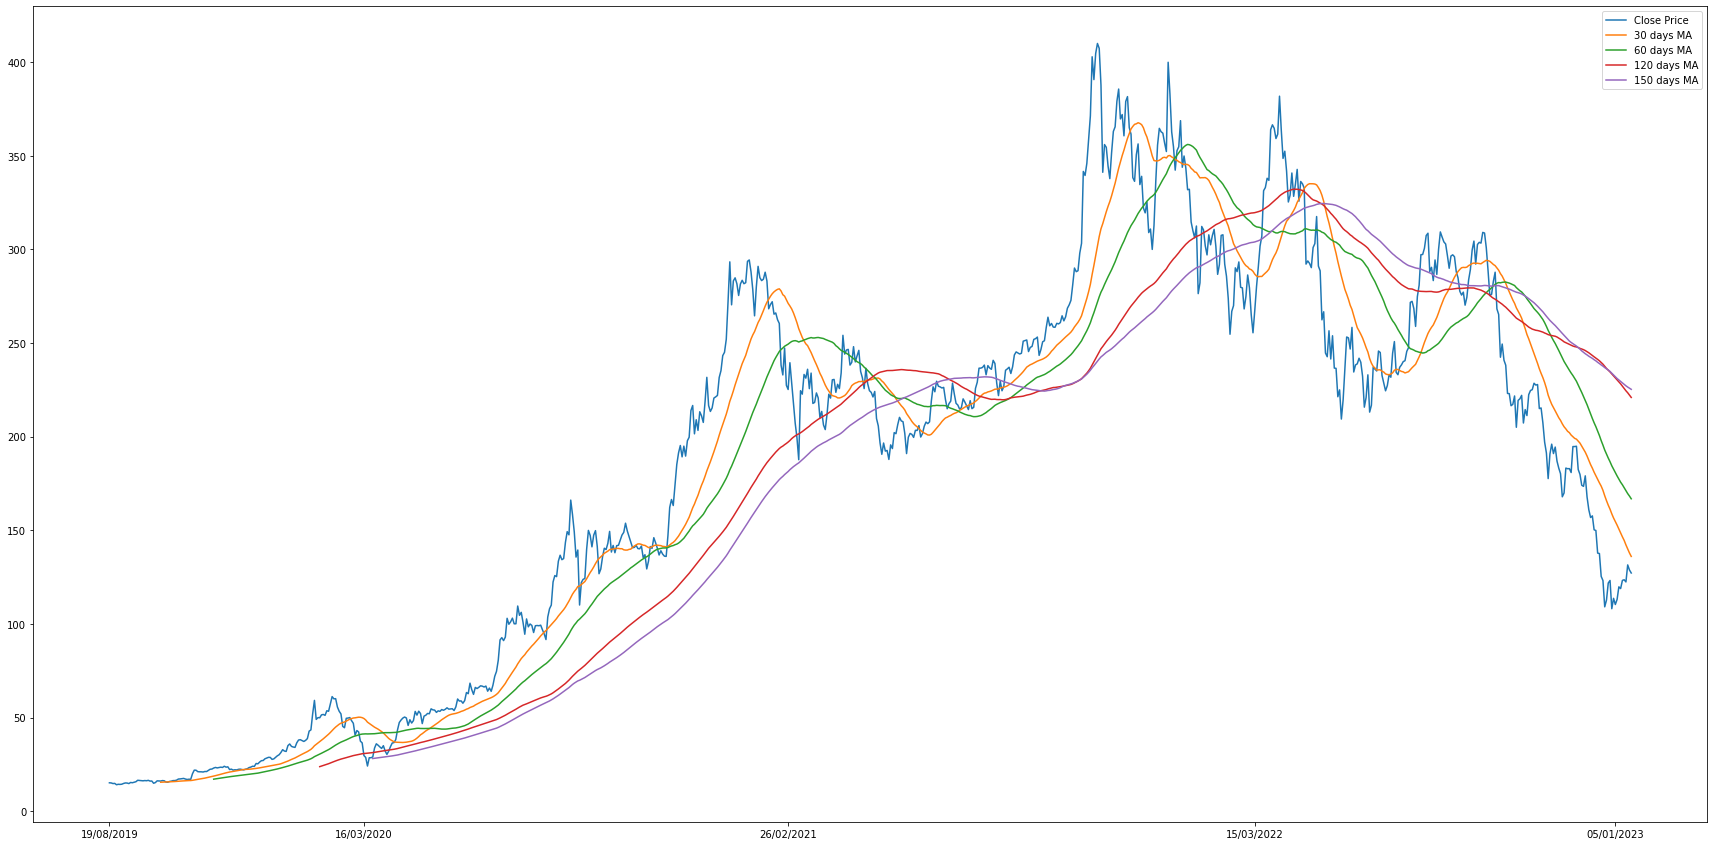

In [11]:
plt.figure(figsize=(30,15))
plt.plot(data['Close'],label='Close Price')
plt.plot(data['MA for 30 days'],label='30 days MA')
plt.plot(data['MA for 60 days'],label='60 days MA')
plt.plot(data['MA for 120 days'],label='120 days MA')
plt.plot(data['MA for 150 days'],label='150 days MA')
plt.xticks(['19/08/2019','16/03/2020','26/02/2021','15/03/2022','05/01/2023'])
plt.legend()
plt.show()

In [12]:
names = cycle(['Close Price','MA 30 days','MA 60 days','MA 120 days','MA 150 days'])

fig = px.line(data, x=data.index ,y=[data['Close'],data['MA for 30 days'],data['MA for 60 days'],data['MA for 120 days'], data['MA for 150 days']],labels={'date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Moving Average Analysis', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.show()

<div style="padding:10px; 
            color:#FFFFFF;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #181B21;
            background-color:#CC0000;
            overflow:hidden;
            font-weight:500">SPLITTING THE TIME-SERIES DATA</div>

In [13]:
# Creating a new dataframe with only 'Close'
new_df = data['Close']
new_df.index = data.index

final_df=new_df.values

train_data=final_df[0:646,]
test_data=final_df[646:,]

train_df = pd.DataFrame()
test_df = pd.DataFrame()

train_df['Close'] = train_data
train_df.index = new_df[0:646].index
test_df['Close'] = test_data
test_df.index = new_df[646:].index

In [14]:
print("train_data: ", train_df.shape)
print("test_data: ", test_df.shape)

train_data:  (646, 1)
test_data:  (216, 1)



<div style="padding:10px; 
            color:#FFFFFF;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #181B21;
            background-color:#CC0000;
            overflow:hidden;
            font-weight:500">SCALING DATA USING MIN-MAX SCALER</div>

Min-Max Scaler is a pre-processing technique used in machine learning for rescaling a feature or a set of features to a specific range, typically between 0 and 1. The method works by transforming the values of the feature to a new scale, while preserving the relative proportions between the values. The rescaling is done by subtracting the minimum value in the feature from each data point and dividing the result by the range (the difference between the maximum and minimum value). This ensures that all the values in the feature are now in the specified range, with 0 being the minimum and 1 being the maximum. Min-Max scaling is particularly useful when working with algorithms that make assumptions about the scale of the input features, such as some distance-based algorithms or algorithms sensitive to the scale of the input features.

In [15]:
# Using Min-Max scaler to scale data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_df.reshape(-1,1))

X_train_data,y_train_data=[],[]

for i in range(60,len(train_df)):
    X_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
X_train_data,y_train_data=np.array(X_train_data),np.array(y_train_data)

X_train_data=np.reshape(X_train_data,(X_train_data.shape[0],X_train_data.shape[1],1))


<div style="padding:10px; 
            color:#FFFFFF;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #181B21;
            background-color:#CC0000;
            overflow:hidden;
            font-weight:500">MODEL BUILDING</div>

LSTMs are commonly used for modeling time series data as they are able to capture the long-term dependencies between inputs, while also being able to handle the noise and volatility that is often present in time series data. This makes LSTMs suitable for prediction tasks such as stock prices, weather forecasts, and energy demand. In a time series context, LSTMs take in previous time steps as inputs, and use their memory cells, gates, and state updates to process and make predictions on future time steps.

In [16]:
# Initializing the LSTM model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_data.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

2023-02-08 06:46:32.409598: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-08 06:46:32.410491: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-08 06:46:32.415395: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-08 06:46:32.416135: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-08 06:46:32.416889: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [18]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train_data, y_train_data, epochs = 150, batch_size = 32);

2023-02-08 06:46:37.507204: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/150


2023-02-08 06:46:43.300419: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


19/19 [==============================] - 8s 18ms/step - loss: 0.0442
Epoch 2/150
19/19 [==============================] - 0s 14ms/step - loss: 0.0083
Epoch 3/150
19/19 [==============================] - 0s 14ms/step - loss: 0.0072
Epoch 4/150
19/19 [==============================] - 0s 13ms/step - loss: 0.0076
Epoch 5/150
19/19 [==============================] - 0s 12ms/step - loss: 0.0081
Epoch 6/150
19/19 [==============================] - 0s 13ms/step - loss: 0.0068
Epoch 7/150
19/19 [==============================] - 0s 13ms/step - loss: 0.0068
Epoch 8/150
19/19 [==============================] - 0s 13ms/step - loss: 0.0062
Epoch 9/150
19/19 [==============================] - 0s 14ms/step - loss: 0.0051
Epoch 10/150
19/19 [==============================] - 0s 13ms/step - loss: 0.0064
Epoch 11/150
19/19 [==============================] - 0s 13ms/step - loss: 0.0055
Epoch 12/150
19/19 [==============================] - 0s 13ms/step - loss: 0.0051
Epoch 13/150
19/19 [=================


<div style="padding:10px; 
            color:#FFFFFF;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #181B21;
            background-color:#CC0000;
            overflow:hidden;
            font-weight:500">PREDICTIONS</div>

In [19]:
input_data=new_df[len(new_df)-len(test_df)-60:].values
input_data=input_data.reshape(-1,1)
input_data=scaler.transform(input_data)

In [20]:
X_test=[]
for i in range(60,input_data.shape[0]):
    X_test.append(input_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [21]:
predicted=model.predict(X_test)
predicted=scaler.inverse_transform(predicted)

In [22]:
test_df['Predictions']=predicted

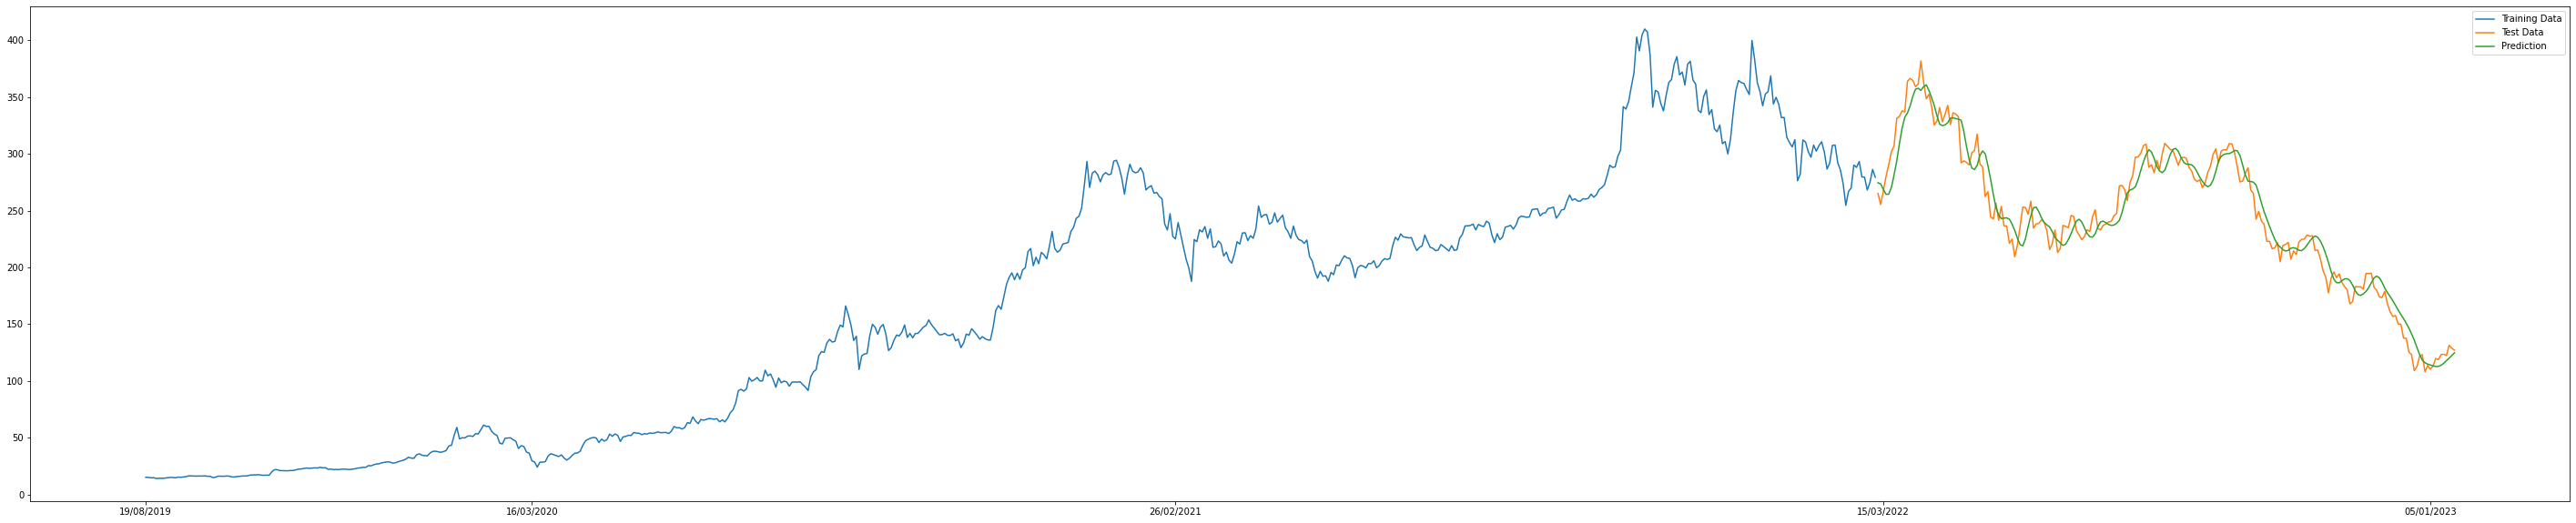

In [23]:
plt.figure(figsize=(50,10))
plt.plot(train_df['Close'],label='Training Data')
plt.plot(test_df['Close'],label='Test Data')
plt.plot(test_df['Predictions'],label='Prediction')
plt.xticks(['19/08/2019','16/03/2020','26/02/2021','15/03/2022','05/01/2023'])
plt.legend()
plt.show()

In [24]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_df.index,y=train_df['Close'],
                    mode='lines',
                    name='Training Data'))
fig.add_trace(go.Scatter(x=test_df.index,y=test_df['Close'],
                    mode='lines',
                    name='Test Data'))
fig.add_trace(go.Scatter(x=test_df.index,y=test_df['Predictions'],
                    mode='lines',
                    name='Prediction'))

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [25]:
print('The Mean Squared Error is',mean_squared_error(test_df['Close'].values,test_df['Predictions'].values))
print('The Mean Absolute Error is',mean_absolute_error(test_df['Close'].values,test_df['Predictions'].values))
print('The Root Mean Squared Error is',np.sqrt(mean_squared_error(test_df['Close'].values,test_df['Predictions'].values)))

The Mean Squared Error is 199.88279857580852
The Mean Absolute Error is 11.557349954268842
The Root Mean Squared Error is 14.137991320403636


<div style="padding:10px; 
            color:#FFFFFF;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #CC0000;
            background-color:#181B21;
            overflow:hidden;
            font-weight:500">To Be Continued...</div>